In [1]:
import pathlib
import pandas as pd

import sys
sys.path.append("../utils")
from load_utils import split_data, load_training_data
from analysis_utils import get_2D_umap_embeddings, show_1D_umap, show_2D_umap, show_3D_umap

2022-08-24 10:03:01.983488: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
training_data_path = pathlib.Path("../3.normalize_data/normalized_data/training_data.csv.gz")
training_data = pd.read_csv(training_data_path, compression="gzip", index_col=0)

In [3]:
training_data["Mitocheck_Phenotypic_Class"].value_counts()

Polylobed             1559
Binuclear              613
Grape                  473
Interphase             388
Prometaphase           334
Artefact               278
Apoptosis              227
ADCCM                  179
MetaphaseAlignment     171
SmallIrregular         101
Hole                    84
Large                   57
Anaphase                53
Metaphase               46
UndefinedCondensed      31
Elongated               30
Folded                  29
Name: Mitocheck_Phenotypic_Class, dtype: int64

In [4]:
classes_to_keep = [
    "Polylobed",
    "Binuclear",
    "Grape",
    "Interphase",
    "Prometaphase",
    "Artefact",
    "Apoptosis",
    # "ADCCM",
    # "MetaphaseAlignment",
    # "SmallIrregular",
    # "Hole",
    # "Large",
    # "Anaphase",
    # "Metaphase",
    # "UndefinedCondensed",
    # "Elongated",
    # "Folded",
]

training_data = training_data.loc[
    training_data["Mitocheck_Phenotypic_Class"].isin(classes_to_keep)
]
training_data

,Mitocheck_Phenotypic_Class,Mitocheck_Object_ID,Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Frame,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,...,efficientnet_1270,efficientnet_1271,efficientnet_1272,efficientnet_1273,efficientnet_1274,efficientnet_1275,efficientnet_1276,efficientnet_1277,efficientnet_1278,efficientnet_1279
1,Artefact,66,1117.070423,342.732394,LT0066_19,287,1,1,LT0066_19_287,LT0066_19/LT0066_19_287_1.tif,...,1.172767,-0.290257,-0.709041,-1.431541,-0.063308,-0.412793,0.452684,-1.906647,1.962141,-0.223039
2,Artefact,66,1116.500000,362.000000,LT0066_19,287,1,1,LT0066_19_287,LT0066_19/LT0066_19_287_1.tif,...,1.093582,-0.323180,-0.663069,-1.427502,-0.901764,-0.355080,0.418053,-2.298449,1.098266,-0.069326
3,Artefact,66,1106.348485,370.469697,LT0066_19,287,1,1,LT0066_19_287,LT0066_19/LT0066_19_287_1.tif,...,0.943948,-0.211267,-0.346355,-1.365543,-0.276932,0.023856,0.376514,-1.700348,1.833686,-0.625385
5,Prometaphase,126,1305.853333,656.426667,LT0066_19,287,1,1,LT0066_19_287,LT0066_19/LT0066_19_287_1.tif,...,1.581095,0.635676,-0.597231,-1.204226,0.247975,0.923955,0.060671,-2.054225,1.040119,-0.528491
7,Prometaphase,144,713.292308,793.892308,LT0066_19,287,1,1,LT0066_19_287,LT0066_19/LT0066_19_287_1.tif,...,0.901425,0.043393,-0.263079,-1.048446,-1.372251,-0.327306,0.102130,0.231623,0.713168,-1.066116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4547,Prometaphase,129,789.269841,822.396825,LT0013_42,107,63,1,LT0013_42_107,LT0013_42/LT0013_42_107_63.tif,...,0.635422,2.282483,1.082398,-1.488141,0.856597,2.352848,0.110520,0.199644,1.088866,1.268423
4548,Prometaphase,131,811.966667,860.416667,LT0013_42,107,63,1,LT0013_42_107,LT0013_42/LT0013_42_107_63.tif,...,0.352556,2.147545,3.460106,-1.415711,0.495824,4.063777,-0.522205,-0.064294,2.008646,-0.559794
4549,Binuclear,147,856.925532,974.404255,LT0013_42,107,63,1,LT0013_42_107,LT0013_42/LT0013_42_107_63.tif,...,0.922171,4.206158,-0.766269,-0.441770,-0.622790,0.827851,0.293225,0.678457,0.402142,1.215261
4550,Binuclear,147,845.923913,996.076087,LT0013_42,107,63,1,LT0013_42_107,LT0013_42/LT0013_42_107_63.tif,...,1.163489,4.551716,-0.148320,0.212508,-0.730820,1.169467,1.030874,-0.758244,0.216580,1.430450


In [5]:
metadata_dataframe, feature_data = split_data(training_data)
phenotypic_classes = metadata_dataframe["Mitocheck_Phenotypic_Class"]

In [6]:
point_size = 20
alpha = 1
color_palette = "bright"

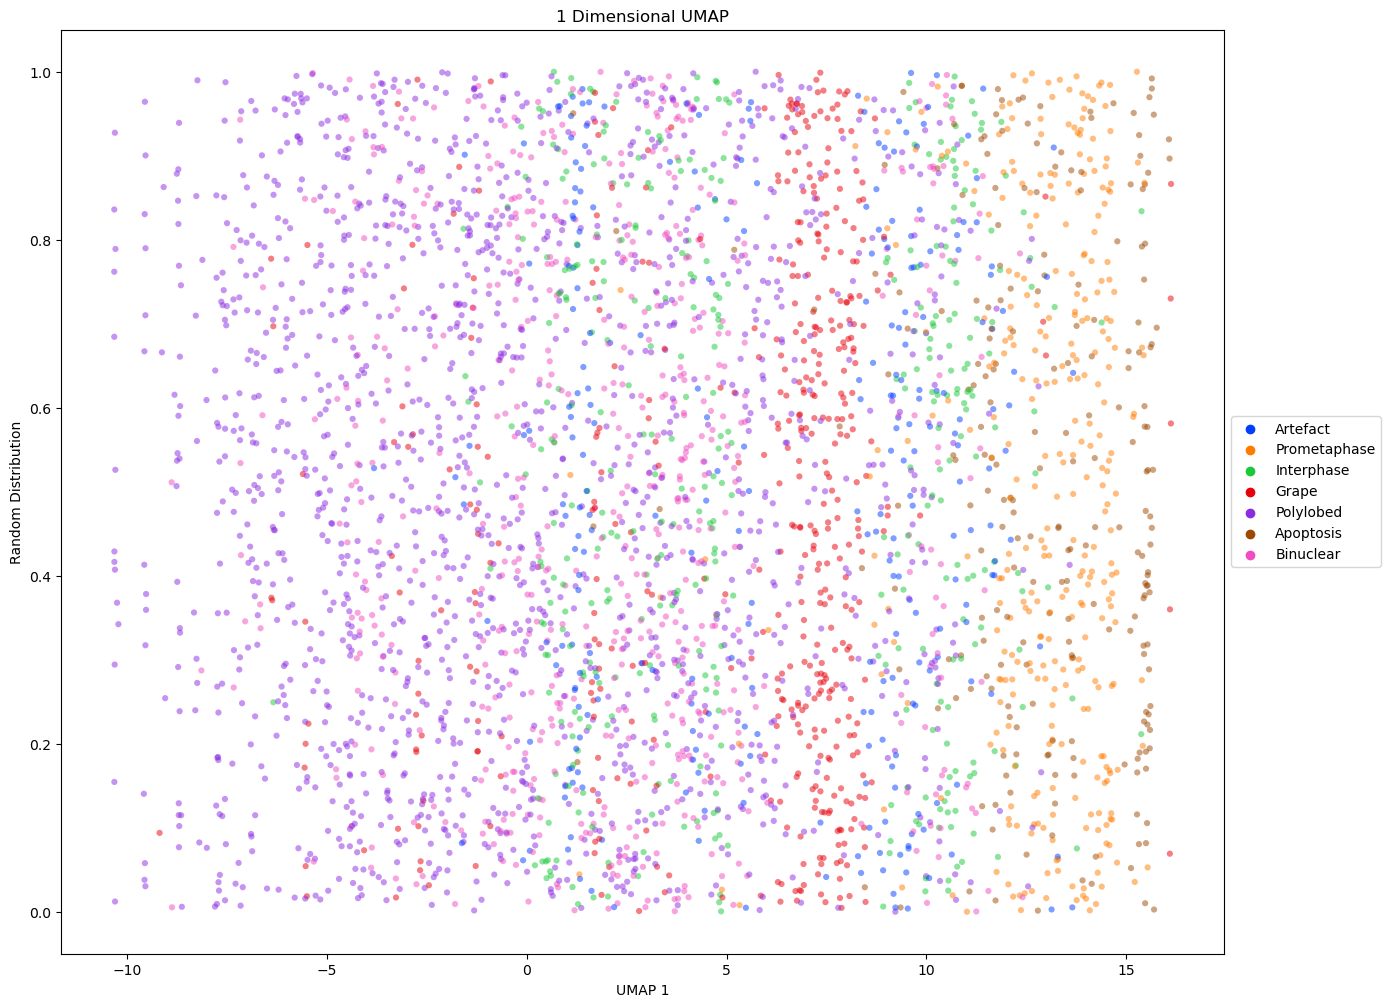

In [7]:
show_1D_umap(feature_data, phenotypic_classes, point_size=point_size, alpha=alpha, palette=color_palette)

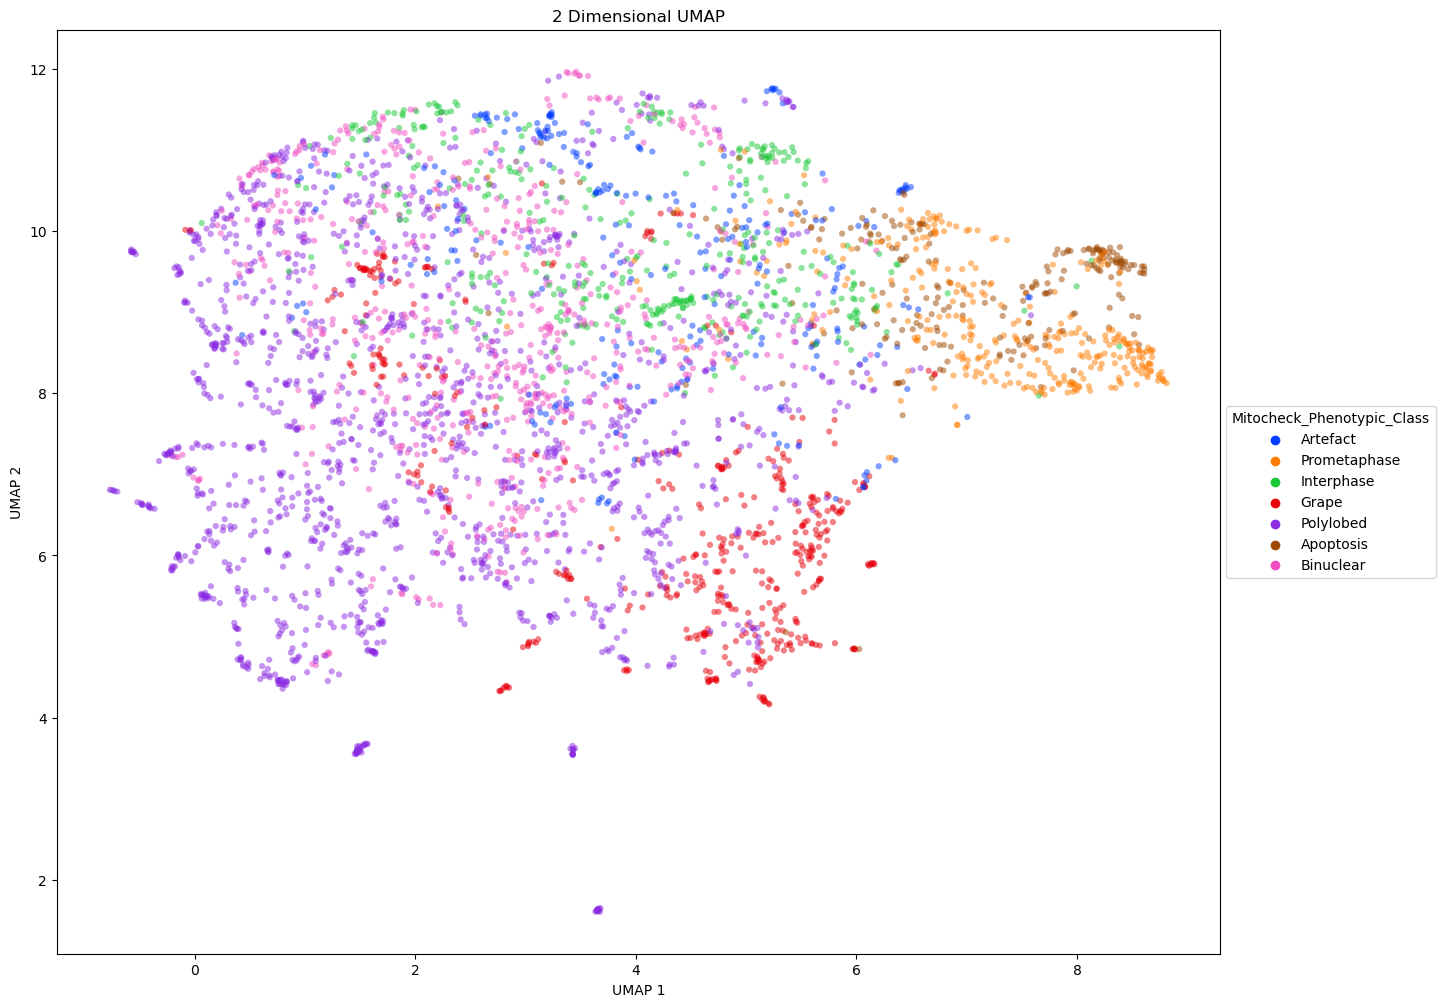

In [8]:
x_data, y_data = get_2D_umap_embeddings(feature_data)
show_2D_umap(x_data, y_data, phenotypic_classes, point_size=point_size, alpha=alpha, palette=color_palette)

In [9]:
show_3D_umap(feature_data, phenotypic_classes, point_size=point_size, alpha=alpha, palette=color_palette)